In [1]:
import warnings
warnings.filterwarnings(action="ignore")

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import CIFAR-10 dataset

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### CIFAR-10 classes

              
0 : airplane   |
1 : automobile |
2 : bird       |
3 : cat        |
4 : deer       | 
5 : dog        |
6 : frog       |
7 : horse      |
8 : ship       |
9 : truck      |

# Data Preprocessing

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [5]:
single_image = x_train[0]

print(single_image.shape)

(32, 32, 3)


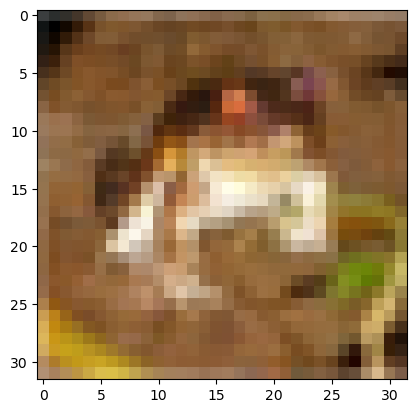

In [6]:
_ = plt.imshow(single_image)

In [7]:
# Labeled as integers
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
# One-hot encode both train and test labels
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

# Normalize the data

In [10]:
# Values range from 0 to 255 for each of the RGB colour channel
print(single_image.min(), single_image.max())

0 255


In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
print(x_train[0].min(), x_train[0].max())

0.0 1.0


# Building a Convolutional Neural Network

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [14]:
model = Sequential()

model.add(
    Conv2D(
        filters=32,
        kernel_size=(4,4),
        strides=(1,1),
        padding='valid',
        input_shape=(32,32,3),
        activation="relu"
    )
)

model.add(MaxPool2D(pool_size=(2,2)))

model.add(
    Conv2D(
        filters=64,
        kernel_size=(4,4),
        strides=(1,1),
        padding='valid',
        input_shape=(32,32,3),
        activation="relu"
    )
)

model.add(MaxPool2D(pool_size=(2,2)))



model.add(Flatten())

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))

# OUTPUT LAYER
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               8

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor="val_loss", patience=2, verbose=1)

In [18]:
model.fit(x_train, 
          y_cat_train, 
          batch_size=128,
          validation_data=(x_test, y_cat_test), 
          epochs=20, 
          callbacks=[early_stop]
)

Epoch 1/20
391/391 [==============================] - 26s 63ms/step - loss: 1.6803 - accuracy: 0.3781 - val_loss: 1.3397 - val_accuracy: 0.5142
Epoch 2/20
391/391 [==============================] - 23s 59ms/step - loss: 1.3114 - accuracy: 0.5304 - val_loss: 1.1441 - val_accuracy: 0.5957
Epoch 3/20
391/391 [==============================] - 24s 60ms/step - loss: 1.1413 - accuracy: 0.6003 - val_loss: 1.0539 - val_accuracy: 0.6219
Epoch 4/20
391/391 [==============================] - 28s 72ms/step - loss: 1.0348 - accuracy: 0.6411 - val_loss: 1.0250 - val_accuracy: 0.6467
Epoch 5/20
391/391 [==============================] - 26s 67ms/step - loss: 0.9459 - accuracy: 0.6686 - val_loss: 0.9696 - val_accuracy: 0.6634
Epoch 6/20
391/391 [==============================] - 27s 69ms/step - loss: 0.8810 - accuracy: 0.6937 - val_loss: 0.9851 - val_accuracy: 0.6585
Epoch 7/20
391/391 [==============================] - 26s 65ms/step - loss: 0.8186 - accuracy: 0.7161 - val_loss: 0.8908 - val_accuracy:

# Evaluate Performance

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.680311,0.37806,1.339736,0.5142
1,1.311358,0.53038,1.144148,0.5957
2,1.141317,0.60026,1.053935,0.6219
3,1.034834,0.64106,1.025028,0.6467
4,0.945892,0.66864,0.969647,0.6634


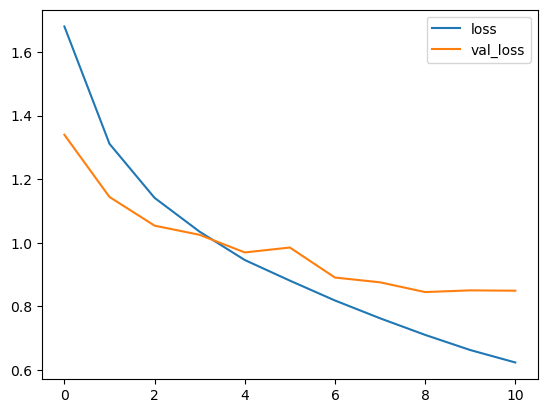

In [21]:
_ = metrics[["loss", "val_loss"]].plot()

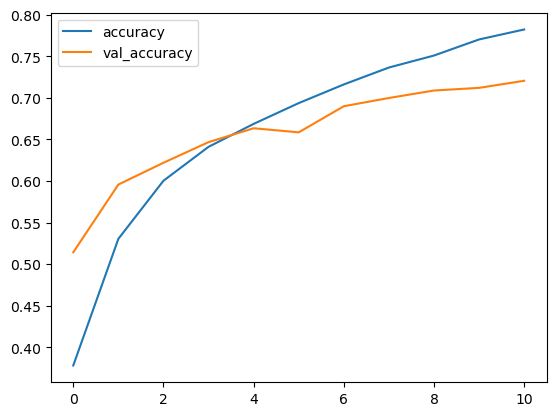

In [22]:
_ = metrics[["accuracy", "val_accuracy"]].plot()

In [23]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.8492988348007202, 0.7204999923706055]

In [24]:
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 7ms/step


In [25]:
y_pred

array([3, 1, 8, ..., 5, 1, 7])

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1000
           1       0.83      0.83      0.83      1000
           2       0.75      0.50      0.60      1000
           3       0.54      0.56      0.55      1000
           4       0.71      0.65      0.68      1000
           5       0.62      0.62      0.62      1000
           6       0.73      0.84      0.78      1000
           7       0.76      0.75      0.75      1000
           8       0.78      0.84      0.81      1000
           9       0.74      0.86      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



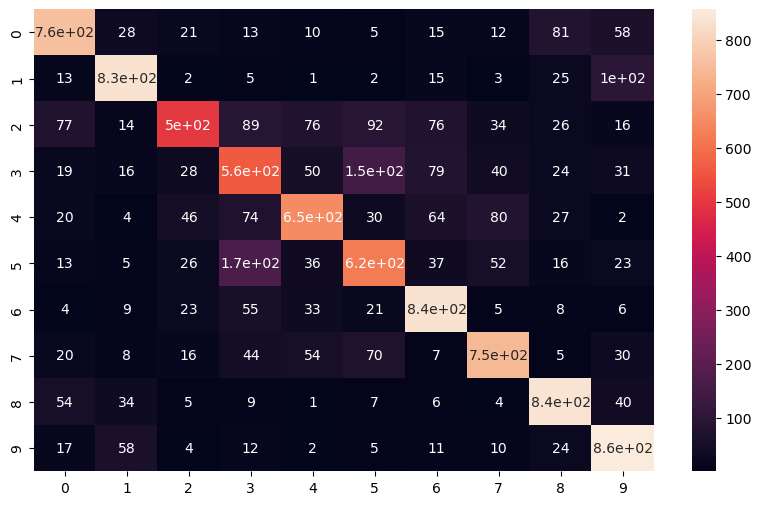

In [27]:
plt.figure(figsize=(10,6))
_ = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# Make a prediction of a single image

In [28]:
rand_idx = np.random.randint(0, len(x_test))
my_image = x_test[rand_idx]

In [29]:
my_image.shape

(32, 32, 3)

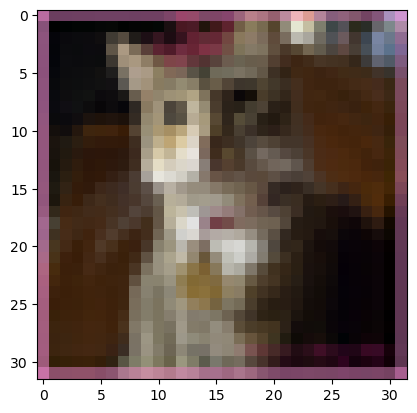

In [30]:
_ = plt.imshow(my_image)

In [31]:
my_image_pred = np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis=-1)

1/1 [==============================] - 0s 27ms/step


In [32]:
print("Predicted image: {}\nActual image: {}".format(my_image_pred, y_test[rand_idx]))

Predicted image: [3]
Actual image: [3]
